In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#load generator data
gds = {}
gds[2019] = pickle.load(open('Data/generator_data_short_WECC_2019.obj', 'rb'))
gds[2020] = pickle.load(open('Data/generator_data_short_WECC_2020.obj', 'rb'))

colorset = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']
'''Color list:
indigo, cyan, teal, green, sand, rose, wine, olive, purple
uncontrolled, color = colorset[0], '-*'
mef normal all access, color = colorset[4], '-X'
mef normal plugged, color = colorset[6]
aef all access, color = colorset[3], 
aef plugged, color = colorset[1]
mef cascade all access, color = colorset[5]
mef cascade plugged, color = colorset[8]
'''

path_string = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF/'
path_string_aef = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/AEF/'
path_string_cascade = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_Cascade/'
path_string_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_2030/'
path_string_aef_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/AEF_2030/'
path_string_cascade_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_2030_Cascade/'
result_dates = ['20231207']

In [2]:
def results_gperkwh_fxn_avg(numev_set, path_string, run_numbers, result_date, current_year = None, month=1):
    '''Function to calculate average g/kWh for each run number and number of EVs added'''
    if current_year == 2030:
        #use 2020 for uncontrolled data
        dpdf_year = '2020'
        #get reference baseline projected 2030 demand

        reference_df = pd.read_csv('Results/' +'2030_dpdf_'+'20220522'+ '.csv')

    #default = 2020
    else:
        dpdf_year = '2020'
        reference_df = pd.read_csv('Results/2020_dpdf_20220522.csv')

    if month == 1:
        time_period_string = '2020-01-01_to_2020-01-31'
    elif month == 7: 
        time_period_string = '2020-07-01_to_2020-07-31'

    results_gperkwh_avg = pd.DataFrame(index=numev_set, columns=['uncontrolled', 'uncontrolled_2s', 'varying_access', 'varying_plugged', 'varying_access_2s', 'varying_plugged_2s'])
    for num_evs in numev_set:
        results_gperkwh = pd.DataFrame(index=run_numbers, columns=['uncontrolled', 'varying_access', 'varying_plugged'])
        for run_number in run_numbers:
            df_total_uncontrolled = {}; df_uncontrolled_dpdf = {}
            df_controlled_dpdf = {'varying':{'access':{}, 'plugged':{}}}
            df_total_controlled = { 'varying':{'access':{}, 'plugged':{}}}
    
            #save uncontrolled demand data in df
            df_total_uncontrolled[num_evs] = pd.read_csv(path_string + str(num_evs)+'EVs_added/Uncontrolled/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
            df_total_uncontrolled[num_evs].datetime = pd.to_datetime(df_total_uncontrolled[num_evs].datetime)
            df_uncontrolled_dpdf[num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Uncontrolled/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
            df_uncontrolled_dpdf[num_evs].datetime = pd.to_datetime(df_uncontrolled_dpdf[num_evs].datetime)
            
            for signal1 in ['varying']:
                try: #if have both plugged and access saved
                    for signal2 in ['access', 'plugged']:
                        df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                        df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                        df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                        df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)
                except: #if don't have plugged and access saved
                    try:
                        for signal2 in ['access']:
                            df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                            df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                            df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                            df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)
                    except:
                        for signal2 in ['plugged']:
                            df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                            df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                            df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                            df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)

            #find dates to plot (inds)
            signal1 = 'varying'
            signal2 = 'access'
            try:
                dpdf_inds = df_uncontrolled_dpdf[num_evs][df_uncontrolled_dpdf[num_evs].datetime.dt.date.isin(df_total_controlled[signal1][signal2][num_evs].datetime.dt.date.unique())].index
            except:
                signal2 = 'plugged'
                dpdf_inds = df_uncontrolled_dpdf[num_evs][df_uncontrolled_dpdf[num_evs].datetime.dt.date.isin(df_total_controlled[signal1][signal2][num_evs].datetime.dt.date.unique())].index

            delta_co2 = df_uncontrolled_dpdf[num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
            delta_demand = df_uncontrolled_dpdf[num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
            #print(num_evs, run_number, delta_co2)
            #print(num_evs, run_number, delta_demand)

            
            results_gperkwh.loc[run_number, 'uncontrolled'] = delta_co2/delta_demand
            
            signal1 = 'varying'
            signal2_set = ['access', 'plugged']
            try:
                for signal2 in signal2_set:
                    delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                    delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                    results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand
            except:
                try:
                    for signal2 in ['access']:
                        delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                        delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                        results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand
                except:
                    for signal2 in ['plugged']:
                        delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                        delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                        results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand
        
        results_gperkwh_avg.loc[num_evs, 'uncontrolled'] = np.average(results_gperkwh.loc[:, 'uncontrolled'])
        results_gperkwh_avg.loc[num_evs, 'varying_access'] = np.nanmean(results_gperkwh.loc[:, 'varying_access'])
        results_gperkwh_avg.loc[num_evs, 'varying_plugged'] = np.nanmean(results_gperkwh.loc[:, 'varying_plugged'])
        results_gperkwh_avg.loc[num_evs, 'uncontrolled_2s'] = 2 * np.std(results_gperkwh.loc[:, 'uncontrolled'])
        results_gperkwh_avg.loc[num_evs, 'varying_access_2s'] = 2 * np.std(results_gperkwh.loc[:, 'varying_access'])
        results_gperkwh_avg.loc[num_evs, 'varying_plugged_2s'] = 2 * np.std(results_gperkwh.loc[:, 'varying_plugged'])

    return results_gperkwh_avg

## Plot normalized added emissions

In [3]:
def multi_run_plot(numev_set, results_gperkwh, results_gperkwh_aef, results_cascade, fig, axes, year2030=False, aef=False, title=False, save_name='totalemissions_adding_evs', to_plot = [0], cascade_2 = None, max_lim=675, legend_pos = 'lower right'):

    xvals = numev_set
    #uncontrolled, color = colorset[0]
    #mef normal all access, color = colorset[4]
    #mef normal plugged, color = colorset[6]
    #aef all access, color = colorset[3]
    #aef plugged, color = colorset[1]
    #mef cascade all access, color = colorset[5]
    #mef cascade plugged, color = colorset[8]

    if np.sum(np.isin(0, to_plot)): # uncontrolled
        axes.plot(xvals, results_gperkwh.uncontrolled, '*', label='Uncontrolled', color = colorset[0], markersize=18)
        axes.fill_between(xvals, np.array(results_gperkwh.uncontrolled - results_gperkwh.uncontrolled_2s, dtype=float), np.array(results_gperkwh.uncontrolled + results_gperkwh.uncontrolled_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[0])
    
    if np.sum(np.isin(1, to_plot)): #sr-mef max sessions
        axes.plot(xvals, results_gperkwh.varying_access, 'X', label='MEF, Max. Sessions', color=colorset[4], markersize=11)
        axes.fill_between(xvals, np.array(results_gperkwh.varying_access - results_gperkwh.varying_access_2s, dtype=float), np.array(results_gperkwh.varying_access + results_gperkwh.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[4])
    
    if np.sum(np.isin(2, to_plot)): #sr-mef existing sessions
        axes.plot(xvals, results_gperkwh.varying_plugged, 'o', label='MEF, Existing Sessions', color=colorset[6], markersize=13)
        axes.fill_between(xvals, np.array(results_gperkwh.varying_plugged - results_gperkwh.varying_plugged_2s, dtype=float), np.array(results_gperkwh.varying_plugged + results_gperkwh.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[6])

    if np.sum(np.isin(3, to_plot)): #aef max sessions
        axes.plot(xvals, results_gperkwh_aef.varying_access, 's',  label='AEF, Max. Sessions', color=colorset[3], markersize=13)
        axes.fill_between(xvals, np.array(results_gperkwh_aef.varying_access - results_gperkwh_aef.varying_access_2s, dtype=float), np.array(results_gperkwh_aef.varying_access + results_gperkwh_aef.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[3])
    
    if np.sum(np.isin(4, to_plot)): #aef existing sessions
        axes.plot(xvals, results_gperkwh_aef.varying_plugged, 'P',  label='AEF, Existing Sessions', color=colorset[1], markersize=14)
        axes.fill_between(xvals, np.array(results_gperkwh_aef.varying_plugged - results_gperkwh_aef.varying_plugged_2s, dtype=float), np.array(results_gperkwh_aef.varying_plugged + results_gperkwh_aef.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[1])


    if cascade_2 is None:
        if np.sum(np.isin(5, to_plot)): #mef cascade all access 20 groups
            axes.plot(xvals, results_cascade.varying_access, 'd', label='Cascading MEF, Max. Sessions', color = colorset[5], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_access - results_cascade.varying_access_2s, dtype=float), np.array(results_cascade.varying_access + results_cascade.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[5])

        if np.sum(np.isin(6, to_plot)): #mef cascade plugged 20 groups
            axes.plot(xvals, results_cascade.varying_plugged, 'H', label='Cascading MEF, Existing Sessions', color = colorset[8], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_plugged - results_cascade.varying_plugged_2s, dtype=float), np.array(results_cascade.varying_plugged + results_cascade.varying_plugged_2s, dtype=float),alpha=0.6, linewidth=.6, color = colorset[8])


    axes.set_xlim([-100000,numev_set[-1]+100000])
    axes.set_xticks(np.linspace(0,numev_set[-1],5))
    axes.set_xticklabels(np.linspace(0, numev_set[-1], 5, dtype=int), fontsize=18)

    axes.set_xlabel('Number of EVs Added', fontsize=20)
   
    axes.set_yticks(np.arange(350, max_lim, 50))
    axes.set_yticklabels(np.arange(350, max_lim, 50), fontsize=20)
    axes.set_ylabel('Added CO$_2$ Emissions [kg/MWh]', fontsize=20)
    axes.legend(fontsize=13.5, loc=4)
    axes.legend(fontsize=15.5, loc=legend_pos)
  
    axes.grid(axis='y')
    if title:
        pass

    plt.tight_layout()
    plt.savefig('Added_Emissions/'+save_name+'.pdf', bbox_inches='tight')
    plt.show()
    return 
    

# Figure 3a

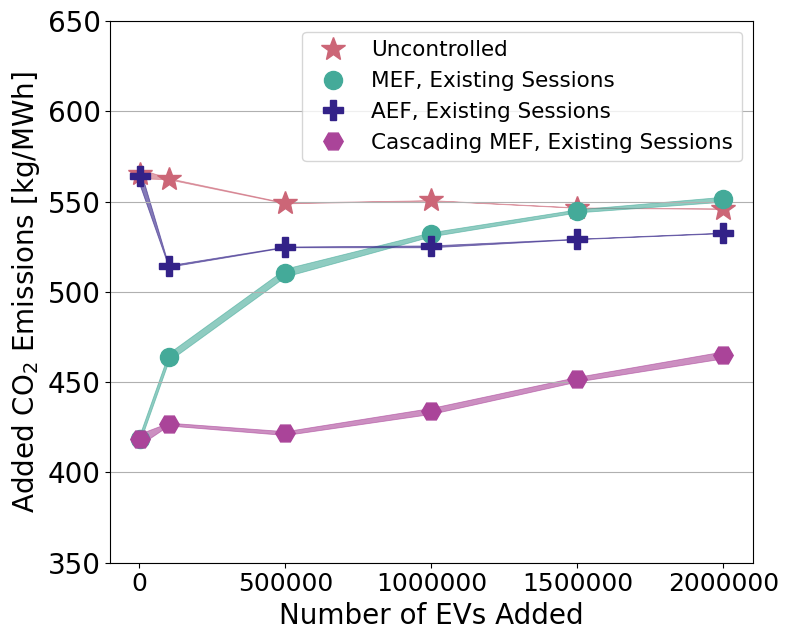

In [4]:
#run custom added emissions plot
run_nums = [str(i) for i in range(15)]

added_EVs = [1000,100000, 500000, 1000000, 1500000, 2000000]
fig1, axes1 = plt.subplots(figsize=(8,6.5))

#get SR-MEF
results_gperkwh = results_gperkwh_fxn_avg(added_EVs, path_string, run_nums, result_dates[0])

#get AEF
results_gperkwh_aef = results_gperkwh_fxn_avg(added_EVs, path_string_aef, run_nums, result_dates[0])

#get cascade
results_cascade = results_gperkwh_fxn_avg(added_EVs, path_string_cascade, run_nums, result_dates[0])

multi_run_plot(added_EVs, results_gperkwh, results_gperkwh_aef, results_cascade, fig1, axes1, title=False, save_name='3a_added_emissions_jan_20_exist', to_plot = [0,2, 4,6], legend_pos='upper right') 



In [5]:
## print table:
print('1,000      & ' + str(np.round((1-results_gperkwh.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\% & ' + str(np.round((1-results_cascade.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\%  \\ ' + '\\')
print('100,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[100000] / results_gperkwh.uncontrolled[100000])* 100, 1)) + '\%  \\ ' + '\\')
print('500,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[500000] / results_gperkwh.uncontrolled[500000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,000,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,500,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000])* 100, 1)) + '\%  \\ ' + '\\')
print('2,000,000  & ' +str(np.round((1-results_gperkwh.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) + '\%  \\ ' + '\\')

1,000      & 26.0\% & 0.3\% & 26.0\%  \ \
100,000    & 17.6\% & 8.6\% & 24.2\%  \ \
500,000    & 7.0 \% & 4.4\% & 23.2\%  \ \
1,000,000  & 3.4 \% & 4.6\% & 21.2\%  \ \
1,500,000  & 0.3 \% & 3.2\% & 17.4\%  \ \
2,000,000  & -1.0 \% & 2.5\% & 14.8\%  \ \


In [6]:
print('1,000      & '+ str(np.round(results_gperkwh.uncontrolled[1000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000],1))       +' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000],1)) + '\\' + '\\')
print('100,000    & '+ str(np.round(results_gperkwh.uncontrolled[100000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[100000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[100000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[100000],1)) + '\\' + '\\')
print('500,000    & '+ str(np.round(results_gperkwh.uncontrolled[500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[500000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[500000],1)) + '\\' + '\\')
print('1,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[1000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000000],1)) + '\\' + '\\')
print('1,500,000  & '+ str(np.round(results_gperkwh.uncontrolled[1500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1500000],1)) + '\\' + '\\')
print('2,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[2000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[2000000],1)) + '\\' + '\\')

1,000      & 565.5 & 418.7 & 564.1 & 418.3\\
100,000    & 562.7 & 463.9 & 514.3 & 426.8\\
500,000    & 549.2 & 510.7 & 524.9 & 421.8\\
1,000,000  & 550.7 & 531.9 & 525.2 & 434.1\\
1,500,000  & 546.6 & 544.9 & 529.3 & 451.7\\
2,000,000  & 546.1 & 551.3 & 532.7 & 465.1\\


# Figure 3b

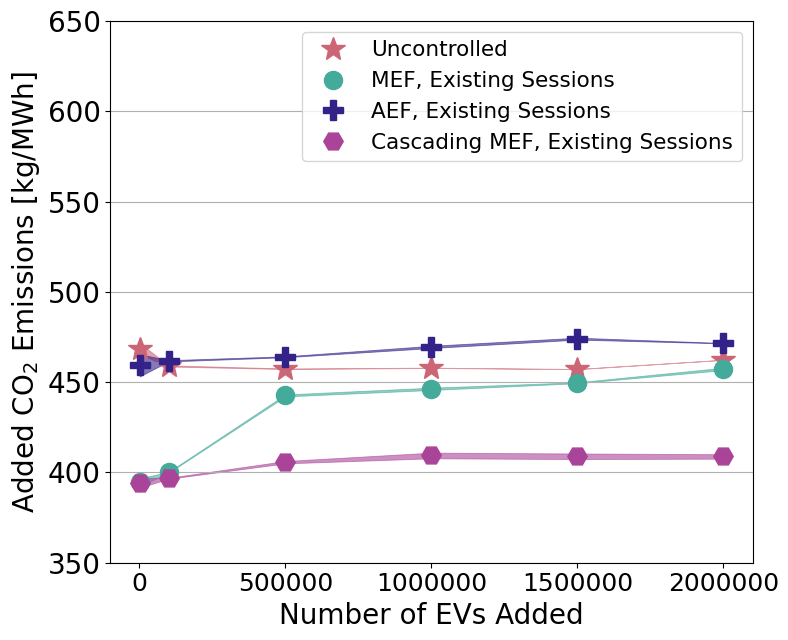

In [7]:
# run custom main plot - 2030
run_nums = [str(i) for i in range(15)]

added_EVs = [1000,100000, 500000, 1000000, 1500000, 2000000] 
fig1, axes1 = plt.subplots(figsize=(8,6.5))

#get MEF
result_dates = ['20231214']
results_gperkwh = results_gperkwh_fxn_avg(added_EVs, path_string_2030, run_nums, result_dates[0], current_year=2030)

#get AEF
result_dates = ['20231207']
results_gperkwh_aef = results_gperkwh_fxn_avg(added_EVs, path_string_aef_2030, run_nums, result_dates[0], current_year=2030)

#get cascade
results_cascade = pd.DataFrame(columns = ['uncontrolled', 'varying_access', 'varying_plugged'])
for i, num_evs in enumerate(added_EVs):
    temp = results_gperkwh_fxn_avg([num_evs], path_string_cascade_2030, run_nums, result_dates[0], current_year=2030)
    results_cascade.loc[num_evs, 'varying_access'] = temp.loc[num_evs, 'varying_access'] 
    results_cascade.loc[num_evs, 'varying_access_2s'] = temp.loc[num_evs, 'varying_access_2s'] 
    results_cascade.loc[num_evs, 'varying_plugged'] = temp.loc[num_evs, 'varying_plugged'] 
    results_cascade.loc[num_evs, 'varying_plugged_2s'] = temp.loc[num_evs, 'varying_plugged_2s'] 


multi_run_plot(added_EVs, results_gperkwh, results_gperkwh_aef, results_cascade, fig1, axes1, title=False, save_name='3b_added_emissions_jan_30_exist', to_plot = [0,2,4,6], legend_pos='upper right') 

In [8]:
## print table:
print('1,000      & ' + str(np.round((1-results_gperkwh.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\% & ' + str(np.round((1-results_cascade.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\%  \\ ' + '\\')
print('100,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[100000] / results_gperkwh.uncontrolled[100000])* 100, 1)) + '\%  \\ ' + '\\')
print('500,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[500000] / results_gperkwh.uncontrolled[500000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,000,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,500,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000])* 100, 1)) + '\%  \\ ' + '\\')
print('2,000,000  & ' +str(np.round((1-results_gperkwh.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) + '\%  \\ ' + '\\')

1,000      & 15.8\% & 2.0\% & 15.9\%  \ \
100,000    & 12.8\% & -0.6\% & 13.6\%  \ \
500,000    & 3.2 \% & -1.4\% & 11.3\%  \ \
1,000,000  & 2.5 \% & -2.5\% & 10.6\%  \ \
1,500,000  & 1.7 \% & -3.7\% & 10.6\%  \ \
2,000,000  & 1.1 \% & -2.0\% & 11.6\%  \ \


In [9]:
print('1,000      & '+ str(np.round(results_gperkwh.uncontrolled[1000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000],1))       +' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000],1)) + '\\' + '\\')
print('100,000    & '+ str(np.round(results_gperkwh.uncontrolled[100000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[100000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[100000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[100000],1)) + '\\' + '\\')
print('500,000    & '+ str(np.round(results_gperkwh.uncontrolled[500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[500000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[500000],1)) + '\\' + '\\')
print('1,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[1000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000000],1)) + '\\' + '\\')
print('1,500,000  & '+ str(np.round(results_gperkwh.uncontrolled[1500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1500000],1)) + '\\' + '\\')
print('2,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[2000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[2000000],1)) + '\\' + '\\')

1,000      & 468.6 & 394.5 & 459.3 & 394.3\\
100,000    & 459.0 & 400.0 & 461.8 & 396.8\\
500,000    & 457.4 & 442.6 & 464.1 & 405.7\\
1,000,000  & 457.9 & 446.3 & 469.5 & 409.4\\
1,500,000  & 457.2 & 449.7 & 474.1 & 409.0\\
2,000,000  & 462.4 & 457.3 & 471.6 & 408.9\\


# Figure 3c

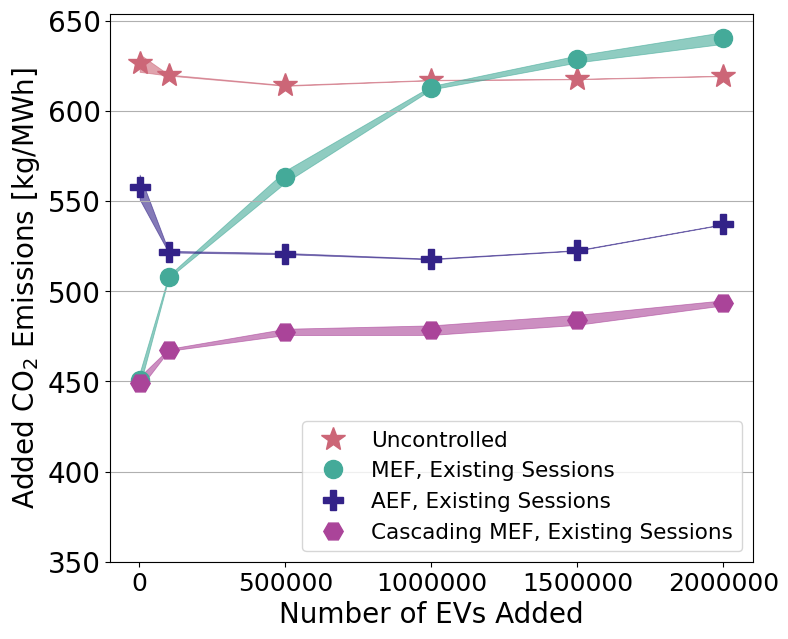

In [10]:
#run custom added emissions plot

run_nums = [str(i) for i in range(15)]

added_EVs = [1000, 100000,500000, 1000000, 1500000, 2000000]
fig1, axes1 = plt.subplots(figsize=(8,6.5))

#get SR-MEF
results_gperkwh = results_gperkwh_fxn_avg(added_EVs, path_string, run_nums, result_dates[0], month=7)

#get AEF
results_gperkwh_aef = results_gperkwh_fxn_avg(added_EVs, path_string_aef, run_nums, result_dates[0], month=7)


results_cascade = pd.DataFrame(columns = ['uncontrolled', 'varying_access', 'varying_plugged'])

for i, num_evs in enumerate(added_EVs):
    temp = results_gperkwh_fxn_avg([num_evs], path_string_cascade, run_nums, result_dates[0], month=7)
    results_cascade.loc[num_evs, 'varying_access'] = temp.loc[num_evs, 'varying_access'] 
    results_cascade.loc[num_evs, 'varying_access_2s'] = temp.loc[num_evs, 'varying_access_2s'] 
    results_cascade.loc[num_evs, 'varying_plugged'] = temp.loc[num_evs, 'varying_plugged'] 
    results_cascade.loc[num_evs, 'varying_plugged_2s'] = temp.loc[num_evs, 'varying_plugged_2s'] 


multi_run_plot(added_EVs, results_gperkwh, results_gperkwh_aef, results_cascade, fig1, axes1, title=False, save_name='3c_added_emissions_jul_20_exist', to_plot = [0,2,4,6], max_lim=675) 

In [11]:
## print table:
print('1,000      & ' + str(np.round((1-results_gperkwh.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\% & ' + str(np.round((1-results_cascade.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\%  \\ ' + '\\')
print('100,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[100000] / results_gperkwh.uncontrolled[100000])* 100, 1)) + '\%  \\ ' + '\\')
print('500,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[500000] / results_gperkwh.uncontrolled[500000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,000,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,500,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000])* 100, 1)) + '\%  \\ ' + '\\')
print('2,000,000  & ' +str(np.round((1-results_gperkwh.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) + '\%  \\ ' + '\\')

1,000      & 28.0\% & 11.0\% & 28.3\%  \ \
100,000    & 18.1\% & 15.8\% & 24.6\%  \ \
500,000    & 8.2 \% & 15.2\% & 22.2\%  \ \
1,000,000  & 0.7 \% & 16.1\% & 22.5\%  \ \
1,500,000  & -1.8 \% & 15.4\% & 21.6\%  \ \
2,000,000  & -3.4 \% & 13.3\% & 20.3\%  \ \


In [12]:
print('1,000      & '+ str(np.round(results_gperkwh.uncontrolled[1000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000],1))       +' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000],1)) + '\\' + '\\')
print('100,000    & '+ str(np.round(results_gperkwh.uncontrolled[100000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[100000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[100000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[100000],1)) + '\\' + '\\')
print('500,000    & '+ str(np.round(results_gperkwh.uncontrolled[500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[500000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[500000],1)) + '\\' + '\\')
print('1,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[1000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000000],1)) + '\\' + '\\')
print('1,500,000  & '+ str(np.round(results_gperkwh.uncontrolled[1500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1500000],1)) + '\\' + '\\')
print('2,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[2000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[2000000],1)) + '\\' + '\\')

1,000      & 626.4 & 450.9 & 557.7 & 449.3\\
100,000    & 619.8 & 507.9 & 521.9 & 467.4\\
500,000    & 614.0 & 563.5 & 520.8 & 477.4\\
1,000,000  & 617.0 & 612.8 & 517.8 & 478.4\\
1,500,000  & 617.6 & 628.7 & 522.6 & 484.1\\
2,000,000  & 619.3 & 640.4 & 537.1 & 493.5\\


# Figure 3d

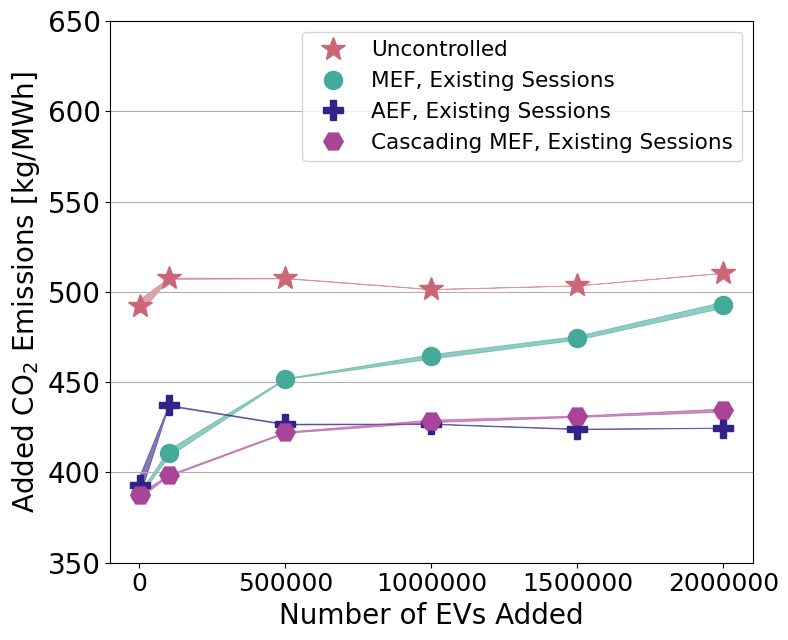

In [13]:
# run custom main plot - 2030
run_nums = [str(i) for i in range(15)]

added_EVs = [1000, 100000, 500000, 1000000, 1500000, 2000000] 
fig1, axes1 = plt.subplots(figsize=(8,6.5))

#get MEF
result_dates = ['20231214']
results_gperkwh = results_gperkwh_fxn_avg(added_EVs, path_string_2030, run_nums, result_dates[0], current_year=2030, month=7)

#get AEF
result_dates = ['20231207']
results_gperkwh_aef = results_gperkwh_fxn_avg(added_EVs, path_string_aef_2030, run_nums, result_dates[0], current_year=2030, month=7)

#get cascade
results_cascade = results_gperkwh_fxn_avg(added_EVs, path_string_cascade_2030, run_nums, result_dates[0], current_year=2030, month=7)

multi_run_plot(added_EVs, results_gperkwh, results_gperkwh_aef, results_cascade, fig1, axes1, title=False, save_name='3d_added_emissions_jul_30_exist', to_plot = [0,2,4,6], legend_pos='upper right') 

In [14]:
## print table:
print('1,000      & ' + str(np.round((1-results_gperkwh.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\% & ' + str(np.round((1-results_cascade.varying_plugged[1000] / results_gperkwh.uncontrolled[1000]) * 100, 1)) + '\%  \\ ' + '\\')
print('100,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[100000] / results_gperkwh.uncontrolled[100000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[100000] / results_gperkwh.uncontrolled[100000])* 100, 1)) + '\%  \\ ' + '\\')
print('500,000    & ' + str(np.round((1-results_gperkwh.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[500000] / results_gperkwh.uncontrolled[500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[500000] / results_gperkwh.uncontrolled[500000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,000,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1000000] / results_gperkwh.uncontrolled[1000000])* 100, 1)) + '\%  \\ ' + '\\')
print('1,500,000  & ' + str(np.round((1-results_gperkwh.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[1500000] / results_gperkwh.uncontrolled[1500000])* 100, 1)) + '\%  \\ ' + '\\')
print('2,000,000  & ' +str(np.round((1-results_gperkwh.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +' \% & ' + str(np.round((1-results_gperkwh_aef.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) +'\% & '+ str(np.round((1-results_cascade.varying_plugged[2000000] / results_gperkwh.uncontrolled[2000000]) * 100, 1)) + '\%  \\ ' + '\\')

1,000      & 21.2\% & 20.2\% & 21.3\%  \ \
100,000    & 19.0\% & 13.9\% & 21.5\%  \ \
500,000    & 11.0 \% & 15.9\% & 16.8\%  \ \
1,000,000  & 7.4 \% & 14.9\% & 14.5\%  \ \
1,500,000  & 5.8 \% & 15.8\% & 14.4\%  \ \
2,000,000  & 3.4 \% & 16.8\% & 14.9\%  \ \


In [15]:
print('1,000      & '+ str(np.round(results_gperkwh.uncontrolled[1000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000],1))       +' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000],1)) + '\\' + '\\')
print('100,000    & '+ str(np.round(results_gperkwh.uncontrolled[100000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[100000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[100000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[100000],1)) + '\\' + '\\')
print('500,000    & '+ str(np.round(results_gperkwh.uncontrolled[500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[500000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[500000],1)) + '\\' + '\\')
print('1,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[1000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1000000],1)) + '\\' + '\\')
print('1,500,000  & '+ str(np.round(results_gperkwh.uncontrolled[1500000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[1500000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[1500000],1)) + '\\' + '\\')
print('2,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[2000000],1))  +' & ' + str(np.round(results_gperkwh.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_plugged[2000000],1)) + ' & ' + str(np.round(results_cascade.varying_plugged[2000000],1)) + '\\' + '\\')

1,000      & 492.1 & 387.9 & 392.8 & 387.3\\
100,000    & 507.5 & 410.9 & 437.2 & 398.4\\
500,000    & 507.6 & 452.0 & 426.8 & 422.2\\
1,000,000  & 501.5 & 464.3 & 427.0 & 428.6\\
1,500,000  & 503.6 & 474.6 & 424.1 & 431.1\\
2,000,000  & 510.6 & 493.0 & 424.7 & 434.5\\
